## 1. 處理資料
* Impute
* 刪除資料

In [93]:
import pandas as pd
import numpy as np
import scipy.stats
from sklearn.impute import KNNImputer
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
data = pd.read_csv("Data.csv")

In [95]:
data.head()

,Unnamed: 0,icustay_id,leavetime,los,intime,outtime,first_careunit,admittime,deathtime,dischtime,...,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean
0,0,298201,233.694722,9.8318,2185-09-04 21:48:19.000,2185-09-14 17:46:08.000,MICU,2185-09-01 03:19:00.000,2185-09-14 15:30:00.000,2185-09-14 15:30:00.000,...,17.718750,37.222222,38.333333,37.563492,97.0,100.0,99.384615,87.0,103.0,92.333333
1,1,204941,NaN,3.8644,2141-09-10 23:14:32.000,2141-09-14 19:59:19.000,MICU,2141-09-10 23:13:00.000,NaN,2141-10-05 15:15:00.000,...,18.033333,36.111111,38.166665,37.063492,98.0,100.0,99.807692,74.0,108.0,88.200000
2,2,256303,NaN,1.3024,2157-01-06 10:36:14.000,2157-01-07 17:51:42.000,CCU,2157-01-06 10:35:00.000,NaN,2157-02-08 15:30:00.000,...,18.000000,36.111111,36.833335,36.564815,94.0,100.0,98.909091,97.0,135.0,115.000000
3,3,222141,NaN,1.0441,2157-01-12 16:59:09.000,2157-01-13 18:02:43.000,CCU,2157-01-06 10:35:00.000,NaN,2157-02-08 15:30:00.000,...,21.400000,36.222221,37.111113,36.666667,90.0,100.0,98.260870,87.0,205.0,129.250000
4,4,266076,NaN,13.8661,2157-01-19 18:53:02.000,2157-02-02 15:40:15.000,MICU,2157-01-06 10:35:00.000,NaN,2157-02-08 15:30:00.000,...,30.156627,36.000002,37.277777,36.736112,62.0,100.0,97.486486,59.0,123.0,79.500000


In [96]:
data = data.drop(data.columns[0],axis=1)

In [97]:
data.head()

,icustay_id,leavetime,los,intime,outtime,first_careunit,admittime,deathtime,dischtime,dob,...,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean
0,298201,233.694722,9.8318,2185-09-04 21:48:19.000,2185-09-14 17:46:08.000,MICU,2185-09-01 03:19:00.000,2185-09-14 15:30:00.000,2185-09-14 15:30:00.000,2127-12-23 00:00:00.000,...,17.718750,37.222222,38.333333,37.563492,97.0,100.0,99.384615,87.0,103.0,92.333333
1,204941,NaN,3.8644,2141-09-10 23:14:32.000,2141-09-14 19:59:19.000,MICU,2141-09-10 23:13:00.000,NaN,2141-10-05 15:15:00.000,2063-12-13 00:00:00.000,...,18.033333,36.111111,38.166665,37.063492,98.0,100.0,99.807692,74.0,108.0,88.200000
2,256303,NaN,1.3024,2157-01-06 10:36:14.000,2157-01-07 17:51:42.000,CCU,2157-01-06 10:35:00.000,NaN,2157-02-08 15:30:00.000,2099-11-05 00:00:00.000,...,18.000000,36.111111,36.833335,36.564815,94.0,100.0,98.909091,97.0,135.0,115.000000
3,222141,NaN,1.0441,2157-01-12 16:59:09.000,2157-01-13 18:02:43.000,CCU,2157-01-06 10:35:00.000,NaN,2157-02-08 15:30:00.000,2099-11-05 00:00:00.000,...,21.400000,36.222221,37.111113,36.666667,90.0,100.0,98.260870,87.0,205.0,129.250000
4,266076,NaN,13.8661,2157-01-19 18:53:02.000,2157-02-02 15:40:15.000,MICU,2157-01-06 10:35:00.000,NaN,2157-02-08 15:30:00.000,2099-11-05 00:00:00.000,...,30.156627,36.000002,37.277777,36.736112,62.0,100.0,97.486486,59.0,123.0,79.500000


In [98]:
All_num = data.select_dtypes(include=['float64','int'])
#All_num['mortality_90d'] = data.mortality_90d

In [99]:
All_num.head()

,icustay_id,leavetime,los,age,mortality_90d,mingcs,gcsmotor,gcsverbal,gcseyes,endotrachflag,...,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean
0,298201,233.694722,9.8318,58,1,15.0,6.0,0.0,3.0,1.0,...,17.718750,37.222222,38.333333,37.563492,97.0,100.0,99.384615,87.0,103.0,92.333333
1,204941,NaN,3.8644,78,0,15.0,4.0,0.0,1.0,1.0,...,18.033333,36.111111,38.166665,37.063492,98.0,100.0,99.807692,74.0,108.0,88.200000
2,256303,NaN,1.3024,58,0,13.0,6.0,4.0,3.0,0.0,...,18.000000,36.111111,36.833335,36.564815,94.0,100.0,98.909091,97.0,135.0,115.000000
3,222141,NaN,1.0441,58,0,15.0,6.0,5.0,4.0,0.0,...,21.400000,36.222221,37.111113,36.666667,90.0,100.0,98.260870,87.0,205.0,129.250000
4,266076,NaN,13.8661,58,0,15.0,6.0,5.0,4.0,0.0,...,30.156627,36.000002,37.277777,36.736112,62.0,100.0,97.486486,59.0,123.0,79.500000


In [100]:
## 保留所有數據都有數值之資料
All_num.lactate_max[All_num.lactate_max.isna()]

2       NaN
3       NaN
8       NaN
9       NaN
14      NaN
         ..
14803   NaN
14807   NaN
14808   NaN
14809   NaN
14810   NaN
Name: lactate_max, Length: 6011, dtype: float64

In [101]:
All_shape = All_num
for n in All_shape.columns[1:]:
    All_shape = All_shape[-All_shape[n].isna()]
All_shape.shape
print(All_shape.shape)
len(All_shape[All_shape.mortality_90d==0])

(247, 90)


5

In [102]:
All_shape = All_num.drop(["leavetime"],axis=1)
for n in All_shape.columns:
    All_shape = All_shape[-All_shape[n].isna()]
All_shape.shape
print(All_shape.shape)
len(All_shape[All_shape.mortality_90d==0])

(573, 89)


294

In [103]:
All_shape.lactate_max[All_shape.lactate_max.isna()]

Series([], Name: lactate_max, dtype: float64)

In [104]:
## base on KNN k-Nearest Neighbors
Imputer = KNNImputer(n_neighbors=2)
imput_data = All_num.drop(['icustay_id','mortality_90d','age_score','leavetime','los'],axis=1)
imput_data_name = imput_data.columns
imput_data = Imputer.fit_transform(imput_data)
imput_data = pd.DataFrame(imput_data)
imput_data.columns = imput_data_name
imput_data['mortality_90d'] = data['mortality_90d']
imput_data['los'] = data['los']
imput_data.head()


,age,mingcs,gcsmotor,gcsverbal,gcseyes,endotrachflag,aniongap_min,aniongap_max,albumin_min,albumin_max,...,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean,mortality_90d,los
0,58.0,15.0,6.0,0.0,3.0,1.0,17.0,17.0,2.40,2.45,...,38.333333,37.563492,97.0,100.0,99.384615,87.0,103.0,92.333333,1,9.8318
1,78.0,15.0,4.0,0.0,1.0,1.0,13.0,13.0,2.30,2.30,...,38.166665,37.063492,98.0,100.0,99.807692,74.0,108.0,88.200000,0,3.8644
2,58.0,13.0,6.0,4.0,3.0,0.0,16.0,16.0,2.45,2.45,...,36.833335,36.564815,94.0,100.0,98.909091,97.0,135.0,115.000000,0,1.3024
3,58.0,15.0,6.0,5.0,4.0,0.0,12.0,14.0,2.20,2.20,...,37.111113,36.666667,90.0,100.0,98.260870,87.0,205.0,129.250000,0,1.0441
4,58.0,15.0,6.0,5.0,4.0,0.0,13.0,16.0,2.60,2.60,...,37.277777,36.736112,62.0,100.0,97.486486,59.0,123.0,79.500000,0,13.8661


In [105]:
for n in imput_data.columns:
    print(imput_data[n][imput_data[n].isna()])

Series([], Name: age, dtype: float64)
Series([], Name: mingcs, dtype: float64)
Series([], Name: gcsmotor, dtype: float64)
Series([], Name: gcsverbal, dtype: float64)
Series([], Name: gcseyes, dtype: float64)
Series([], Name: endotrachflag, dtype: float64)
Series([], Name: aniongap_min, dtype: float64)
Series([], Name: aniongap_max, dtype: float64)
Series([], Name: albumin_min, dtype: float64)
Series([], Name: albumin_max, dtype: float64)
Series([], Name: bands_min, dtype: float64)
Series([], Name: bands_max, dtype: float64)
Series([], Name: bicarbonate_min, dtype: float64)
Series([], Name: bicarbonate_max, dtype: float64)
Series([], Name: bilirubin_min, dtype: float64)
Series([], Name: bilirubin_max, dtype: float64)
Series([], Name: creatinine_min, dtype: float64)
Series([], Name: creatinine_max, dtype: float64)
Series([], Name: chloride_min, dtype: float64)
Series([], Name: chloride_max, dtype: float64)
Series([], Name: glucose_min_x, dtype: float64)
Series([], Name: glucose_max_x, dt

## 2. Feature selection

In [106]:
## 以類別計算p值
p = []
for variable in All_num.columns[1:]:
    print(variable)
    print("Death :",len(All_num[variable].dropna()[All_num.mortality_90d==1]), "\n",
          "Live :",len(All_num[variable].dropna()[All_num.mortality_90d==0]))
    print (scipy.stats.ttest_ind(All_num[variable].dropna()[All_num.mortality_90d==1],
                         All_num[variable].dropna()[All_num.mortality_90d==0]))
    
    p.append(scipy.stats.ttest_ind(All_num[variable].dropna()[All_num.mortality_90d==1],
                         All_num[variable].dropna()[All_num.mortality_90d==0])[1])

leavetime
Death : 3032 
 Live : 107
Ttest_indResult(statistic=-0.7217140901921415, pvalue=0.47052406603527497)
los
Death : 4693 
 Live : 10118
Ttest_indResult(statistic=4.524115640507156, pvalue=6.112005241921071e-06)
age
Death : 4693 
 Live : 10118
Ttest_indResult(statistic=21.751546349623244, pvalue=2.745279289522603e-103)
mortality_90d
Death : 4693 
 Live : 10118
Ttest_indResult(statistic=inf, pvalue=0.0)
mingcs
Death : 4684 
 Live : 10102
Ttest_indResult(statistic=-11.084469760069329, pvalue=1.9315505072324684e-28)
gcsmotor
Death : 4631 
 Live : 9978
Ttest_indResult(statistic=-6.848049413504915, pvalue=7.785255217844229e-12)
gcsverbal
Death : 4656 
 Live : 10028
Ttest_indResult(statistic=-5.7757728126433925, pvalue=7.815137772428747e-09)
gcseyes
Death : 4665 
 Live : 10065
Ttest_indResult(statistic=-6.181942529741663, pvalue=6.498737451021142e-10)
endotrachflag
Death : 4684 
 Live : 10102
Ttest_indResult(statistic=-0.3362517828854311, pvalue=0.7366857789395874)
aniongap_min
Death :

Ttest_indResult(statistic=-0.6512378162132934, pvalue=0.5149031708210614)
glucose_mean
Death : 4645 
 Live : 10045
Ttest_indResult(statistic=-0.6079926808815358, pvalue=0.5432017287432849)


In [107]:
All_num.sapsii_prob

0        0.285486
1        0.025876
2        0.181020
3        0.196366
4        0.247443
           ...   
14806    0.247443
14807    0.009611
14808    0.037205
14809    0.680887
14810    0.414604
Name: sapsii_prob, Length: 14811, dtype: float64

In [108]:
np.vstack((All_num.columns[1:], p)).T

array([['leavetime', 0.47052406603527497],
       ['los', 6.112005241921071e-06],
       ['age', 2.745279289522603e-103],
       ['mortality_90d', 0.0],
       ['mingcs', 1.9315505072324684e-28],
       ['gcsmotor', 7.785255217844229e-12],
       ['gcsverbal', 7.815137772428747e-09],
       ['gcseyes', 6.498737451021142e-10],
       ['endotrachflag', 0.7366857789395874],
       ['aniongap_min', 2.7572647299998576e-96],
       ['aniongap_max', 1.0364682960446766e-100],
       ['albumin_min', 9.36647999958637e-38],
       ['albumin_max', 9.523650622333575e-34],
       ['bands_min', 0.3791653429078856],
       ['bands_max', 0.3215419576326136],
       ['bicarbonate_min', 1.6308352702768077e-33],
       ['bicarbonate_max', 1.552516037451314e-23],
       ['bilirubin_min', 5.662174421536918e-46],
       ['bilirubin_max', 5.049130311219131e-46],
       ['creatinine_min', 1.3328957291142455e-17],
       ['creatinine_max', 1.3902639200354101e-14],
       ['chloride_min', 1.166087002090873e-06],

Text(0.5, 1.0, 'los \n p value : 6.112005241921071e-06')

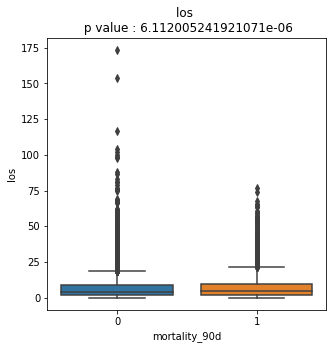

In [109]:
plt.figure(figsize=(5,5))
sns.boxplot(data=All_num,x="mortality_90d",y="los").set_title("los \n p value : 6.112005241921071e-06")


In [110]:
All_num['age_score']
All_num['age_score'].unique()

array([0])

In [111]:
## 相似性分析
All_cor = All_num.drop(['icustay_id','age_score','leavetime'],axis=1).corr()
All_cor

,los,age,mortality_90d,mingcs,gcsmotor,gcsverbal,gcseyes,endotrachflag,aniongap_min,aniongap_max,...,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean
los,1.000000,-0.064659,0.037151,-0.029394,-0.182682,-0.223500,-0.191961,0.204937,-0.002386,0.034476,...,0.041563,0.013441,0.126985,0.110638,-0.030570,0.055705,0.037464,-0.013160,0.005743,0.006679
age,-0.064659,1.000000,0.175954,-0.038984,0.044376,0.021351,0.030442,-0.053848,0.010828,-0.032719,...,-0.031783,-0.132521,-0.178707,-0.188663,-0.051968,-0.019004,-0.042397,0.029838,0.004512,0.005733
mortality_90d,0.037151,0.175954,1.000000,-0.090787,-0.056571,-0.047613,-0.050873,-0.002765,0.171726,0.175645,...,0.118549,-0.121838,-0.098389,-0.135088,-0.103081,-0.029221,-0.080136,-0.014420,-0.005373,-0.005017
mingcs,-0.029394,-0.038984,-0.090787,1.000000,0.296092,0.184151,0.317688,0.355284,-0.019088,-0.044109,...,-0.033255,0.033008,-0.021424,0.001454,0.017645,-0.035494,-0.014898,-0.004727,-0.016596,-0.017578
gcsmotor,-0.182682,0.044376,-0.056571,0.296092,1.000000,0.627286,0.747520,-0.495599,-0.007562,-0.068840,...,0.062353,0.063907,-0.121907,-0.070799,0.022114,-0.043937,-0.057109,0.050107,-0.000714,-0.002185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spo2_max,0.055705,-0.019004,-0.029221,-0.035494,-0.043937,-0.105262,-0.073517,0.075509,-0.098123,-0.062237,...,-0.100564,0.005067,0.060961,0.044318,0.230193,1.000000,0.673796,-0.066971,0.002433,0.000875
spo2_mean,0.037464,-0.042397,-0.080136,-0.014898,-0.057109,-0.139067,-0.098010,0.116689,-0.156882,-0.144029,...,-0.232720,0.031508,0.045152,0.052424,0.636151,0.673796,1.000000,-0.050615,0.005149,0.003256
glucose_min_y,-0.013160,0.029838,-0.014420,-0.004727,0.050107,0.038431,0.032534,-0.039721,0.037169,-0.025518,...,0.037912,0.058844,-0.013193,0.014760,0.016734,-0.066971,-0.050615,1.000000,0.002434,0.026230
glucose_max_y,0.005743,0.004512,-0.005373,-0.016596,-0.000714,-0.007147,-0.007429,-0.004996,-0.011245,-0.007157,...,-0.002039,0.000593,-0.005228,-0.003004,0.001535,0.002433,0.005149,0.002434,1.000000,0.999502


In [112]:
## 與los相關性
dict(All_cor.los)

{'los': 1.0,
 'age': -0.06465942769429511,
 'mortality_90d': 0.0371510349915825,
 'mingcs': -0.02939387563499827,
 'gcsmotor': -0.1826817819188394,
 'gcsverbal': -0.22350043343040493,
 'gcseyes': -0.1919614121324416,
 'endotrachflag': 0.20493686568182357,
 'aniongap_min': -0.002386213362965547,
 'aniongap_max': 0.034476136229371256,
 'albumin_min': -0.08581045095016739,
 'albumin_max': -0.06009949648338541,
 'bands_min': 0.022954919017872243,
 'bands_max': 0.03536313568113034,
 'bicarbonate_min': -0.010703772008404567,
 'bicarbonate_max': 0.024686192964956607,
 'bilirubin_min': -0.007155929036462212,
 'bilirubin_max': 0.0028219121079419004,
 'creatinine_min': -0.02869659206470185,
 'creatinine_max': -0.01764815953276034,
 'chloride_min': -0.012845821899522903,
 'chloride_max': 0.03005320747778647,
 'glucose_min_x': 0.0004066461333553838,
 'glucose_max_x': 0.06656562768237681,
 'hematocrit_min': -0.02054468166503137,
 'hematocrit_max': 0.09915598324728259,
 'hemoglobin_min': -0.01390284

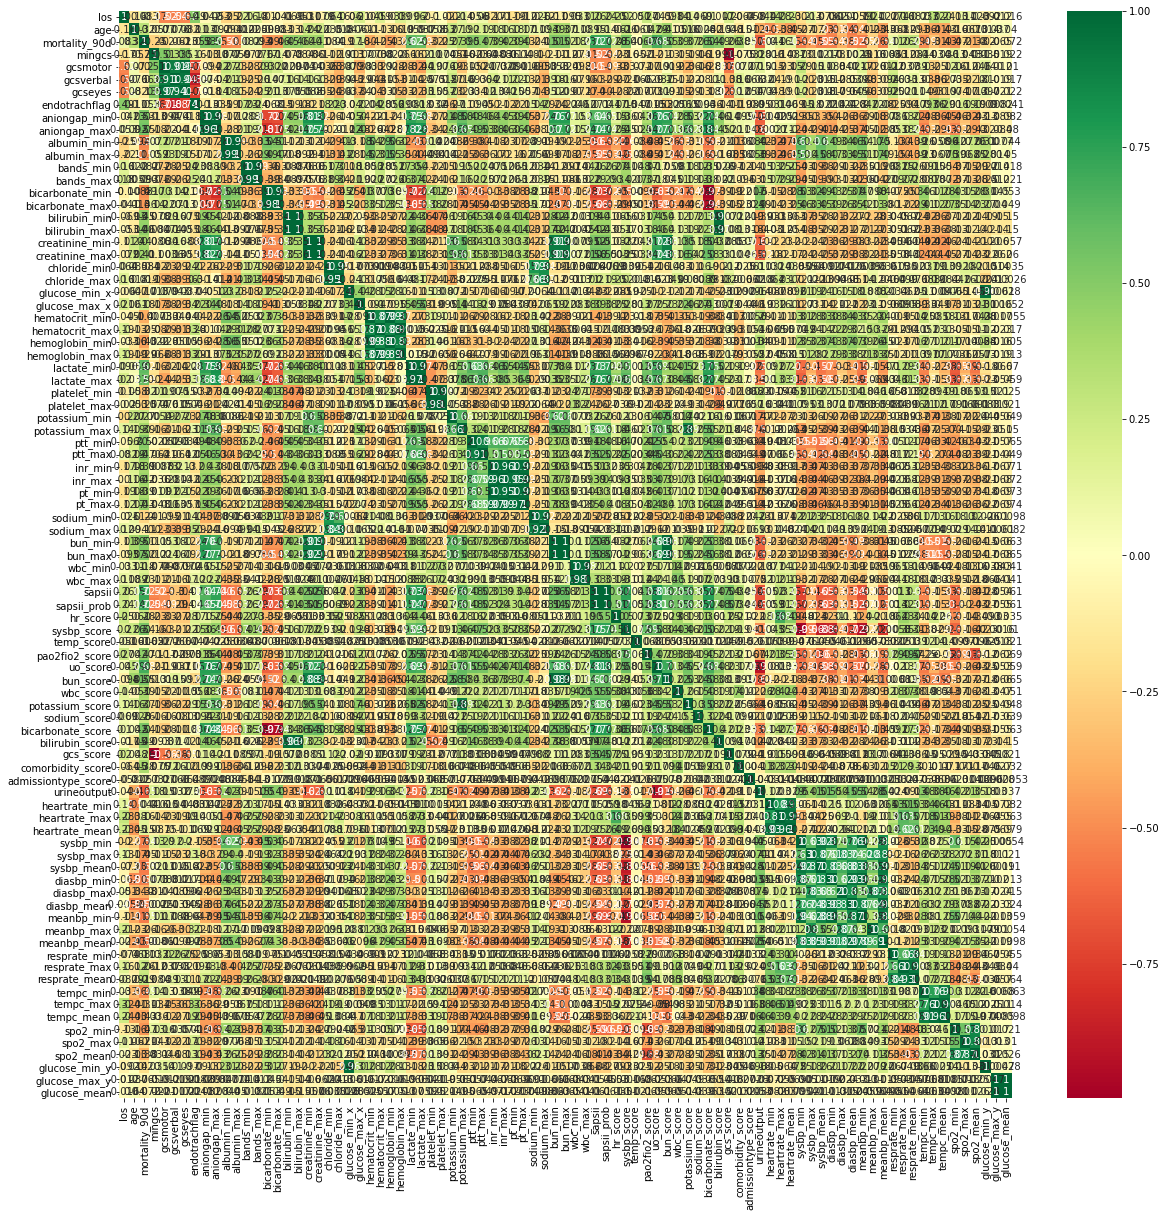

In [113]:
top_corr_features = All_cor.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(All_cor[top_corr_features].corr(),annot=True,cmap="RdYlGn")

[0.00867188 0.01564448 0.01877212 0.00839841 0.00918737 0.00806138
 0.00916986 0.00724359 0.01381239 0.01273438 0.01037206 0.01034615
 0.0112844  0.01108033 0.01244312 0.01046759 0.00957388 0.01058226
 0.01047271 0.00988064 0.00898688 0.01169648 0.00937977 0.01044439
 0.01040265 0.00828793 0.01022401 0.01123687 0.01469238 0.00985326
 0.01082178 0.00909531 0.01021018 0.00914751 0.01387955 0.01168221
 0.01711188 0.01281753 0.01693406 0.01704323 0.00962574 0.01013329
 0.01977859 0.0173254  0.00858819 0.00827569 0.02010482 0.02715411
 0.         0.00821847 0.0097664  0.00048775 0.00985465 0.03305067
 0.02179844 0.00670504 0.00795039 0.00687106 0.01284943 0.01382488
 0.00739262 0.02467468 0.00620096 0.01521597 0.01027633 0.01145731
 0.00897065 0.01084786 0.01145778 0.01344005 0.00971943 0.00977705
 0.01207264 0.00884883 0.00952519 0.01158231 0.00788386 0.01010143
 0.00946956 0.01012213 0.01039784 0.01173011 0.00855015 0.00706104
 0.01024406 0.01120828 0.00866595 0.00859607]


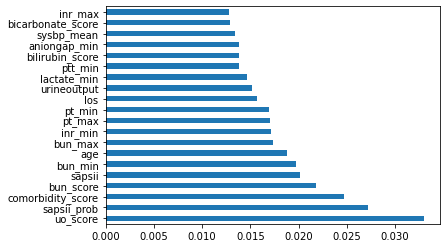

In [114]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(All_shape.drop(["mortality_90d"],axis=1),All_shape.mortality_90d)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=All_shape.drop(["mortality_90d"],axis=1).columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

[0.00815708 0.02025788 0.02084145 0.00336949 0.00797683 0.00302166
 0.00478827 0.         0.00852876 0.00260257 0.00961366 0.01269401
 0.01184369 0.01533915 0.02046918 0.00823467 0.         0.0115577
 0.00890559 0.00763074 0.02460634 0.01017826 0.02501447 0.01732991
 0.0144875  0.00955305 0.01308876 0.00908794 0.01065517 0.01504095
 0.00977852 0.00689139 0.00665273 0.01016553 0.01460508 0.02459166
 0.00174532 0.01876214 0.02328789 0.02995001 0.01570173 0.01222177
 0.02490371 0.03777837 0.01420954 0.01551493 0.07195818 0.
 0.         0.00354908 0.         0.         0.00532806 0.
 0.         0.         0.00164211 0.00131893 0.01113182 0.
 0.         0.02273352 0.01118107 0.02297421 0.01120642 0.00741582
 0.0089253  0.01041444 0.01031565 0.01959541 0.00719899 0.01386494
 0.00351566 0.0111072  0.01209279 0.01404253 0.01802548 0.01301057
 0.01004166 0.00525647 0.00618177 0.01613274 0.00655283 0.00359145
 0.01215397 0.00809962 0.00563649 0.01216971]


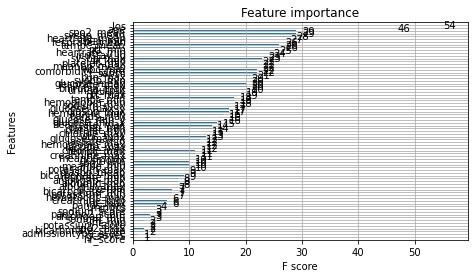

In [115]:
from xgboost import XGBClassifier

from xgboost import plot_importance
model = XGBClassifier()
model.fit(All_shape.drop(["mortality_90d"],axis=1),All_shape.mortality_90d)
# feature importance
print(model.feature_importances_)
# plot
plot_importance(model)
pyplot.show()

<AxesSubplot:>

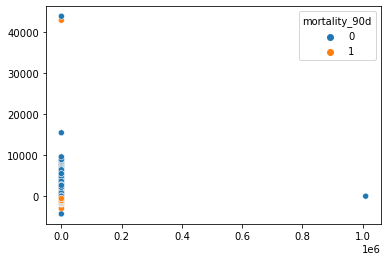

In [116]:
## 觀察樣本分佈狀況
import seaborn as sns
from sklearn.decomposition import PCA
pca_data = imput_data.drop(["los"],axis=1)
pca = PCA(n_components=10).fit_transform(pca_data.drop(["mortality_90d"],axis=1))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue = pca_data.mortality_90d)


In [117]:
np.where(pca[:,0]==max(pca[:,0]))
imput_data.index = [n for n in range(imput_data.shape[0])]
imput_data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            14801, 14802, 14803, 14804, 14805, 14806, 14807, 14808, 14809,
            14810],
           dtype='int64', length=14811)

<AxesSubplot:>

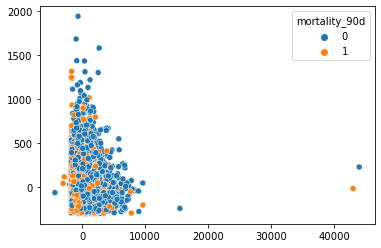

In [118]:
## 觀察樣本分佈狀況
import seaborn as sns
from sklearn.decomposition import PCA
pca_data = imput_data.drop(["los"],axis=1)
pca_data = pca_data.drop(10224,axis=0)
pca = PCA(n_components=10).fit_transform(pca_data.drop(["mortality_90d"],axis=1))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue = pca_data.mortality_90d)

# 3. 模型的建立

In [119]:
## Model

In [120]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [121]:
def ROC(y_test,y_score):
    
    fpr,tpr,threshold = roc_curve(y_test, y_score) ###計算真正率和假正率
    roc_auc = auc(fpr,tpr) ###計算auc的值
    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
    lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率為橫座標，真正率為縱座標做曲線
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [122]:
def svm(data):
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.1, random_state=42)
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    ROC(y_test, out)
    return accuracy_score(y_test, out), out, y_test;
    

In [123]:
def xgboost(data):
    import xgboost as xgb
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.2, random_state=42)
    xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
    xgb_model.fit(X_train, y_train)
    out = xgb_model.predict(X_test)
    ROC(y_test, out)
    return accuracy_score(y_test, out), out, y_test;

In [124]:
def forest(data):
    from sklearn.ensemble import RandomForestClassifier
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    out = model.predict(X_test)
    ROC(y_test, out)
    return accuracy_score(y_test, out), out, y_test;

In [125]:
def learn_curve(history):
    plt.subplot(211)
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    # plot accuracy during training
    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    plt.show()

In [126]:
def DNN(data):
    import keras
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.utils import to_categorical
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.2, random_state=42)
    
    y_train = to_categorical(y_train, 2)
    y_test = to_categorical(y_test, 2)

    input_shape = (X_train.shape[1],)

    # Create the model
    model = Sequential()
    model.add(Dense(32, input_shape=input_shape, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=5, verbose=1, validation_split=0.2)
    
    
    _, train_acc = model.evaluate(X_train, y_train, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    
    learn_curve(history)
    
    return train_acc,test_acc

In [127]:
def confusion(pre,label):
    confmat = confusion_matrix(y_true=label, y_pred=pre)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
    plt.xlabel('predicted label')        
    plt.ylabel('true label')
    plt.show()

In [128]:
def LSR(data):
    # example of training a final regression model
    from sklearn.linear_model import LinearRegression
    from sklearn.datasets import make_regression
    from sklearn.metrics import mean_squared_error
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.los, test_size=0.2, random_state=42)
    # fit final model
    model = LinearRegression()
    model.fit(np.array(X_train), y_train)
    out = model.predict(np.array(X_test))
    return y_test-out, mean_squared_error( y_test,out)

<Figure size 432x288 with 0 Axes>

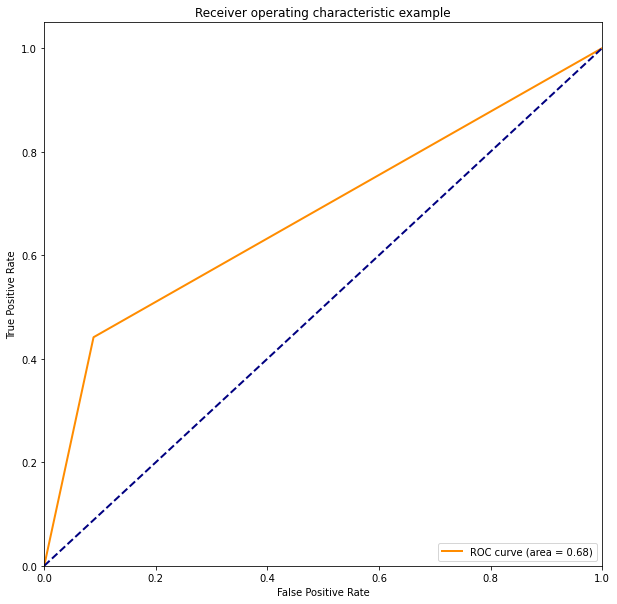

In [129]:
acc, pre, label = svm(imput_data)

In [130]:
acc

0.7678812415654521

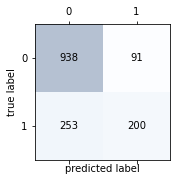

In [131]:
confusion(pre,label)

<Figure size 432x288 with 0 Axes>

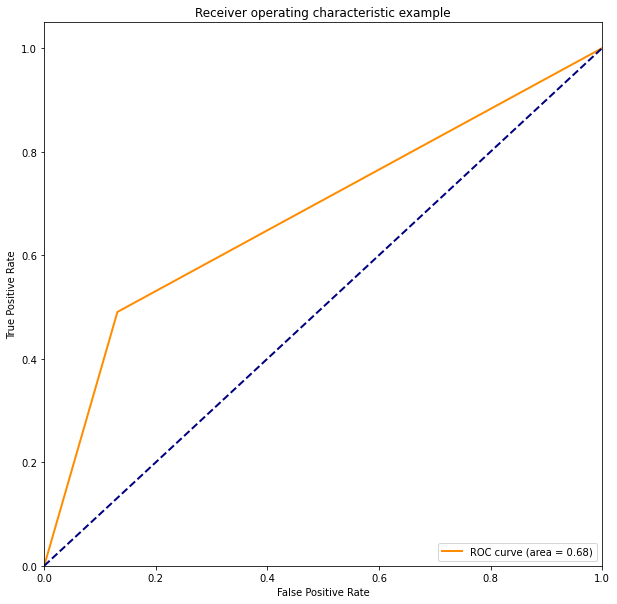

In [132]:
acc, pre, label = xgboost(imput_data)

In [133]:
acc

0.750253121835977

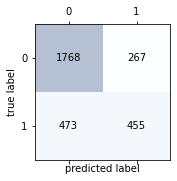

In [134]:
confusion(pre,label)

<Figure size 432x288 with 0 Axes>

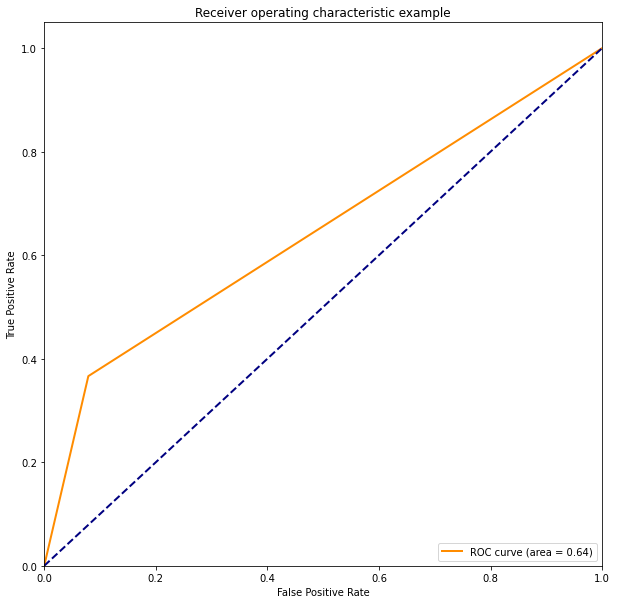

(0.7472156598042524,
 array([0, 1, 0, ..., 1, 0, 0]),
 9611     0
 8570     1
 2662     1
 11888    1
 14801    1
         ..
 12177    0
 11971    0
 5123     1
 8229     1
 4742     0
 Name: mortality_90d, Length: 2963, dtype: int64)

In [135]:
forest(imput_data)

In [136]:
acc

0.750253121835977

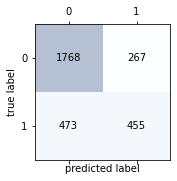

In [137]:
confusion(pre,label)

Epoch 1/10
1896/1896 [==============================] - 2s 832us/step - loss: 1.3224 - accuracy: 0.6724 - val_loss: 0.5798 - val_accuracy: 0.7165
Epoch 2/10
1896/1896 [==============================] - 1s 770us/step - loss: 0.5817 - accuracy: 0.7105 - val_loss: 0.5685 - val_accuracy: 0.7215
Epoch 3/10
1896/1896 [==============================] - 1s 786us/step - loss: 0.5730 - accuracy: 0.7143 - val_loss: 0.5861 - val_accuracy: 0.7203
Epoch 4/10
1896/1896 [==============================] - 1s 768us/step - loss: 0.5847 - accuracy: 0.7186 - val_loss: 0.5950 - val_accuracy: 0.7131
Epoch 5/10
1896/1896 [==============================] - 1s 755us/step - loss: 0.5816 - accuracy: 0.7163 - val_loss: 0.5783 - val_accuracy: 0.7186
Epoch 6/10
1896/1896 [==============================] - 1s 783us/step - loss: 0.5736 - accuracy: 0.7221 - val_loss: 0.5683 - val_accuracy: 0.7169
Epoch 7/10
1896/1896 [==============================] - 1s 757us/step - loss: 0.5643 - accuracy: 0.7248 - val_loss: 0.5802 -

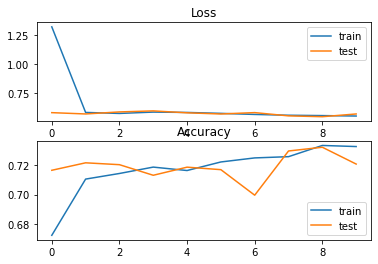

(0.7252700924873352, 0.7323658466339111)

In [138]:
DNN(imput_data)

## 5. 分析步驟組裝

## 5.1 去除缺值之分析

In [139]:
All_shape

,icustay_id,los,age,mortality_90d,mingcs,gcsmotor,gcsverbal,gcseyes,endotrachflag,aniongap_min,...,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean
6,208879,3.4156,65,0,15.0,5.0,0.0,4.0,1.0,12.0,...,16.720000,36.777776,37.111113,36.966666,98.0,100.0,99.650000,164.0,267.0,195.666667
84,281690,34.5145,30,0,15.0,1.0,0.0,1.0,1.0,15.0,...,17.000000,35.888888,40.166668,38.726190,75.0,96.0,90.129032,76.0,138.0,108.142857
86,250110,3.3317,66,1,15.0,1.0,0.0,1.0,1.0,20.0,...,28.574468,37.388891,39.777777,38.500000,91.0,100.0,95.540541,158.0,337.0,265.208333
180,239427,7.1455,67,1,14.0,6.0,5.0,3.0,0.0,6.0,...,25.361905,35.055556,37.055556,36.092593,43.0,100.0,92.804124,64.0,148.0,95.000000
188,253155,24.8361,63,0,15.0,1.0,0.0,1.0,1.0,11.0,...,18.054054,37.444444,38.222222,37.879630,91.0,100.0,95.035714,70.0,363.0,159.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14729,273084,0.6021,77,1,15.0,6.0,5.0,4.0,0.0,15.0,...,19.785714,38.944444,38.944444,38.944444,56.0,100.0,89.750000,130.0,213.0,171.500000
14735,252668,60.8800,57,1,14.0,6.0,4.0,4.0,0.0,16.0,...,26.093750,36.500000,37.833333,37.074074,91.0,97.0,94.576923,86.0,239.0,124.500000
14759,275776,5.0968,41,0,11.0,6.0,1.0,4.0,0.0,20.0,...,23.074074,36.444444,38.555556,37.355556,97.0,100.0,98.714286,151.0,218.0,189.000000
14790,294607,12.3754,21,0,15.0,6.0,5.0,4.0,0.0,15.0,...,37.500000,36.833333,39.111111,38.055556,89.0,100.0,94.700000,98.0,98.0,98.000000


<Figure size 432x288 with 0 Axes>

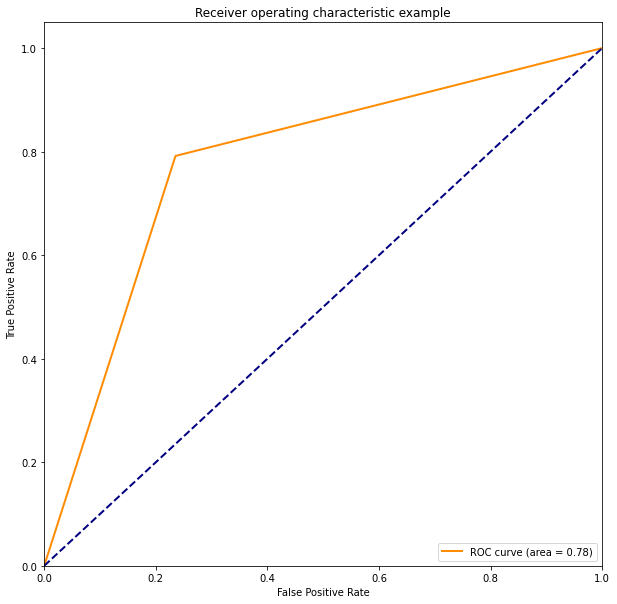

0.7758620689655172


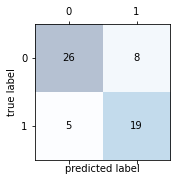

In [140]:
def svm(data):
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.1, random_state=42)
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    ROC(y_test, out)
    return accuracy_score(y_test, out), out, y_test;
    
    

acc, pre, label = svm(All_shape.drop(["icustay_id"],axis=1))
print(acc)
confusion(pre,label)

## 5.2 使用KNNimpute+ExtraTreesClassifier

In [141]:
imput_data.head()

,age,mingcs,gcsmotor,gcsverbal,gcseyes,endotrachflag,aniongap_min,aniongap_max,albumin_min,albumin_max,...,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean,mortality_90d,los
0,58.0,15.0,6.0,0.0,3.0,1.0,17.0,17.0,2.40,2.45,...,38.333333,37.563492,97.0,100.0,99.384615,87.0,103.0,92.333333,1,9.8318
1,78.0,15.0,4.0,0.0,1.0,1.0,13.0,13.0,2.30,2.30,...,38.166665,37.063492,98.0,100.0,99.807692,74.0,108.0,88.200000,0,3.8644
2,58.0,13.0,6.0,4.0,3.0,0.0,16.0,16.0,2.45,2.45,...,36.833335,36.564815,94.0,100.0,98.909091,97.0,135.0,115.000000,0,1.3024
3,58.0,15.0,6.0,5.0,4.0,0.0,12.0,14.0,2.20,2.20,...,37.111113,36.666667,90.0,100.0,98.260870,87.0,205.0,129.250000,0,1.0441
4,58.0,15.0,6.0,5.0,4.0,0.0,13.0,16.0,2.60,2.60,...,37.277777,36.736112,62.0,100.0,97.486486,59.0,123.0,79.500000,0,13.8661


[2.49800134e-02 9.51949222e-03 8.77148196e-03 9.24167223e-03
 9.33160059e-03 5.53594758e-03 1.16573400e-02 1.14348299e-02
 1.15354579e-02 1.17016395e-02 1.08206164e-02 1.07195964e-02
 1.23222374e-02 1.13358022e-02 1.16884370e-02 1.13391261e-02
 1.08549710e-02 1.09783512e-02 1.06475552e-02 1.09787766e-02
 1.03893636e-02 9.81884967e-03 1.03068053e-02 1.06224849e-02
 1.03699721e-02 1.09598525e-02 1.26828208e-02 1.17539835e-02
 1.17408117e-02 1.18616213e-02 1.07283075e-02 1.04392661e-02
 1.14569022e-02 1.09191761e-02 1.16095067e-02 1.07244150e-02
 1.17317676e-02 1.09654437e-02 1.05417557e-02 1.05354714e-02
 1.49691902e-02 1.26342144e-02 1.08759737e-02 1.04407377e-02
 2.93964076e-02 3.08734705e-02 9.85095746e-03 1.04710452e-02
 6.42607140e-05 1.24141763e-02 2.19426721e-02 1.29596769e-02
 7.35435628e-03 8.33265969e-03 6.69132284e-03 9.56940325e-03
 1.18485831e-02 7.20219319e-03 2.61201282e-02 8.62041765e-03
 1.43752022e-02 1.13234952e-02 1.09369782e-02 1.11755643e-02
 1.07354057e-02 1.085352

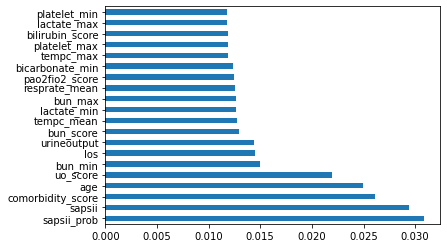

In [142]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(imput_data.drop(["mortality_90d"],axis=1),imput_data.mortality_90d)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=imput_data.drop(["mortality_90d"],axis=1).columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [143]:
imput_X = imput_data[imput_data.drop(["mortality_90d"],axis=1).columns[model.feature_importances_>0.01]]
imput_X["mortality_90d"] = imput_data["mortality_90d"]

<ipython-input-143-35473f8e8063>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imput_X["mortality_90d"] = imput_data["mortality_90d"]


<Figure size 432x288 with 0 Axes>

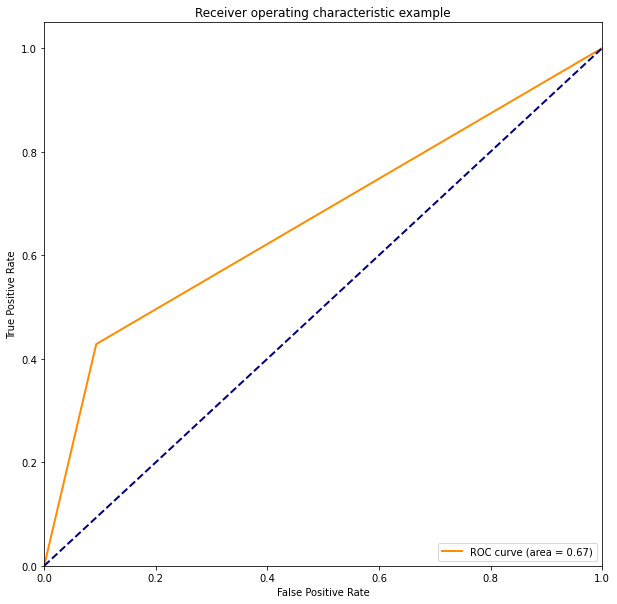

0.7604588394062078


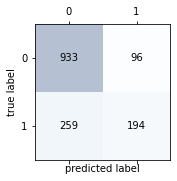

In [144]:
def svm(data):
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.1, random_state=42)
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    ROC(y_test, out)
    return accuracy_score(y_test, out), out, y_test;
    
    

acc, pre, label = svm(imput_X)
print(acc)
confusion(pre,label)

## 5.3 使用KNNimpute+PCA去除樣本

In [145]:
imput_data.index = [n for n in range(imput_data.shape[0])]
imput_data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            14801, 14802, 14803, 14804, 14805, 14806, 14807, 14808, 14809,
            14810],
           dtype='int64', length=14811)

2223


<AxesSubplot:>

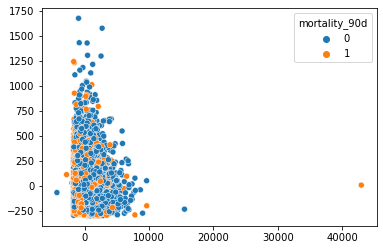

In [146]:
## 觀察樣本分佈狀況
import seaborn as sns
from sklearn.decomposition import PCA
pca_data = imput_data.drop(["los"],axis=1)
pca = PCA(n_components=10).fit_transform(pca_data.drop(["mortality_90d"],axis=1))
print(len([n for n in np.where(pca[:,0]>10)[0]]))
pca_data = pca_data.drop([n for n in np.where(pca[:,0]>10)[0]],axis=0)
pca = PCA(n_components=10).fit_transform(pca_data.drop(["mortality_90d"],axis=1))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue = pca_data.mortality_90d)

<Figure size 432x288 with 0 Axes>

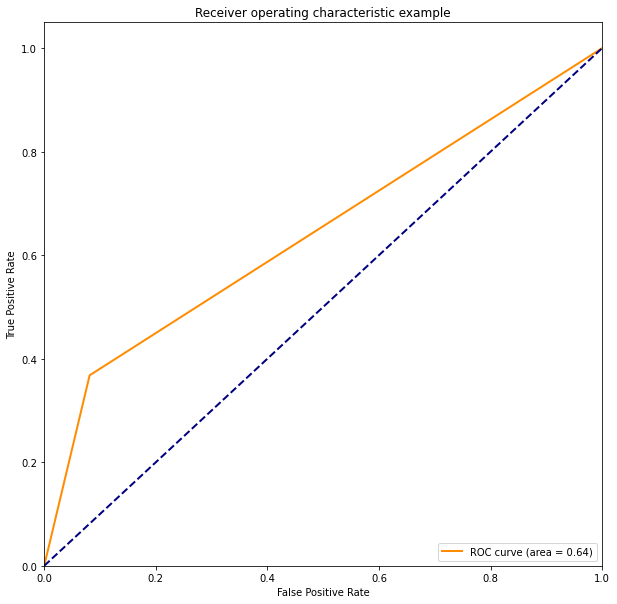

0.7331215250198571


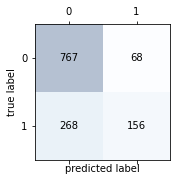

In [147]:
def svm(data):
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.1, random_state=42)
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    ROC(y_test, out)
    return accuracy_score(y_test, out), out, y_test;
    
    

acc, pre, label = svm(pca_data)
print(acc)
confusion(pre,label)

## 5.4 使用KNNimpute+XGBoost特徵篩選

[0.02479569 0.00734546 0.01207062 0.01129153 0.01355333 0.01836686
 0.00895483 0.01263974 0.01000653 0.00908274 0.0078399  0.00960478
 0.01214425 0.00939435 0.01003167 0.00814449 0.01244799 0.0117321
 0.00843752 0.01201001 0.00809345 0.00741382 0.00721467 0.00888618
 0.00855262 0.01039044 0.01210538 0.00971662 0.01163319 0.01187538
 0.00804246 0.0082855  0.0085961  0.00837278 0.02899974 0.00842417
 0.01007545 0.00946823 0.01032413 0.00839257 0.01447065 0.00870951
 0.01097078 0.00940726 0.09198679 0.         0.00853258 0.0123644
 0.         0.00950448 0.00250962 0.03276011 0.00481474 0.01197601
 0.00082292 0.00750165 0.01615398 0.         0.04124934 0.01920285
 0.0173597  0.01077606 0.00910703 0.01034076 0.00925655 0.00935627
 0.0096971  0.00911878 0.00796076 0.0097993  0.00791242 0.00935083
 0.01004502 0.0101974  0.00910928 0.01219289 0.0098984  0.00962313
 0.01116428 0.00998047 0.00835324 0.01022119 0.00764973 0.00797936
 0.00922417 0.01663104]


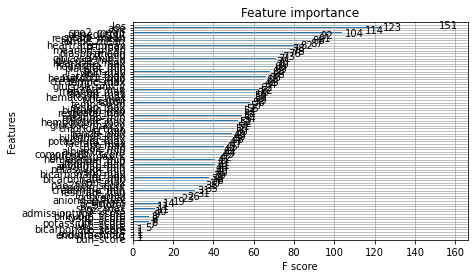

In [148]:
from xgboost import XGBClassifier

from xgboost import plot_importance
model = XGBClassifier()
model.fit(imput_data.drop(["mortality_90d"],axis=1),imput_data.mortality_90d)
# feature importance
print(model.feature_importances_)
# plot
plot_importance(model)
pyplot.show()

In [149]:
imput_G = imput_data[imput_data.drop(["mortality_90d"],axis=1).columns[model.feature_importances_>0.01]]
imput_G["mortality_90d"] = imput_data["mortality_90d"]

<ipython-input-149-dcb4201f06b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imput_G["mortality_90d"] = imput_data["mortality_90d"]


<Figure size 432x288 with 0 Axes>

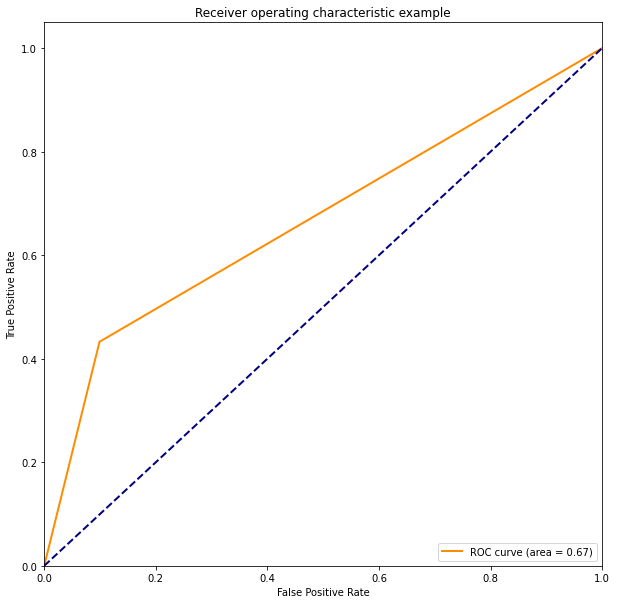

0.7577597840755735


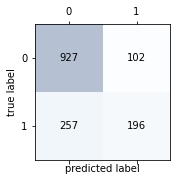

In [150]:
def svm(data):
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.1, random_state=42)
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    ROC(y_test, out)
    return accuracy_score(y_test, out), out, y_test;
    
    

acc, pre, label = svm(imput_G)
print(acc)
confusion(pre,label)

## 5.5 使用KNNimpute+T檢定特徵篩選

In [151]:
## 以類別計算p值
p = []
label = imput_data.mortality_90d
imput_T = imput_data.drop(['mortality_90d'],axis=1)
for variable in imput_T:
    p.append(scipy.stats.ttest_ind(imput_T[variable][label==0],
                         imput_T[variable][label==1]))

In [152]:
p

[Ttest_indResult(statistic=-21.751546349623244, pvalue=2.745279289522603e-103),
 Ttest_indResult(statistic=11.057631904873146, pvalue=2.598515697511994e-28),
 Ttest_indResult(statistic=6.825457392488786, pvalue=9.105099718464372e-12),
 Ttest_indResult(statistic=5.728657469177733, pvalue=1.0319585589933368e-08),
 Ttest_indResult(statistic=6.093621618664307, pvalue=1.1311948798415117e-09),
 Ttest_indResult(statistic=0.34613420717639876, pvalue=0.7292467741380888),
 Ttest_indResult(statistic=-21.201640706827856, pvalue=2.651159093778227e-98),
 Ttest_indResult(statistic=-21.638384591380067, pvalue=2.9794735386685484e-102),
 Ttest_indResult(statistic=15.700094750308352, pvalue=4.1993130549045246e-55),
 Ttest_indResult(statistic=14.358263383004429, pvalue=1.9385623710042675e-46),
 Ttest_indResult(statistic=1.7902011738150818, pvalue=0.07344199799095688),
 Ttest_indResult(statistic=1.145895417342162, pvalue=0.25185694377524037),
 Ttest_indResult(statistic=12.228357447889572, pvalue=3.20708119

In [153]:
pvalue = [n[1] for n in p]

In [154]:
pvalue

[2.745279289522603e-103,
 2.598515697511994e-28,
 9.105099718464372e-12,
 1.0319585589933368e-08,
 1.1311948798415117e-09,
 0.7292467741380888,
 2.651159093778227e-98,
 2.9794735386685484e-102,
 4.1993130549045246e-55,
 1.9385623710042675e-46,
 0.07344199799095688,
 0.25185694377524037,
 3.2070811960190157e-34,
 1.7093727108682482e-24,
 2.0324801479694032e-61,
 2.896565563150874e-62,
 4.084972843085686e-18,
 6.314176822608389e-15,
 7.382426962125088e-07,
 0.0005190364391425747,
 0.2535077315903687,
 0.03378919492409721,
 1.2497095676204738e-16,
 3.8529950325751803e-13,
 7.08262870726714e-30,
 1.4575317285335096e-23,
 3.22903409827491e-104,
 4.203512712315504e-93,
 2.1330540342151747e-19,
 2.1123834968439667e-15,
 6.134117166487521e-15,
 1.2236797084739035e-12,
 8.240430713490674e-42,
 8.615390018832901e-32,
 9.149003861155194e-51,
 8.775161563048973e-44,
 2.4470128175083317e-46,
 2.8980500149749235e-45,
 0.05644872819997335,
 0.45835221703628604,
 1.6624467616106418e-125,
 1.3421885851

In [155]:
imput_P = imput_T[imput_T.columns[np.array(pvalue) < 0.05]]
imput_P['mortality_90d'] = label

<ipython-input-155-35eafb04c0ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imput_P['mortality_90d'] = label


<Figure size 432x288 with 0 Axes>

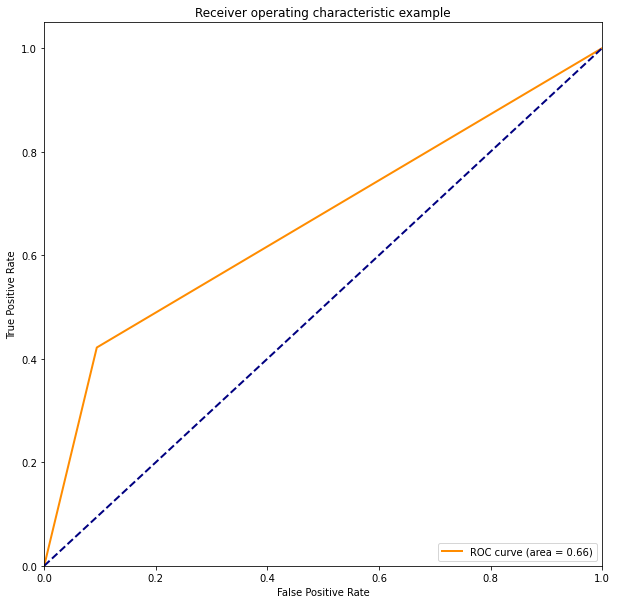

0.7577597840755735


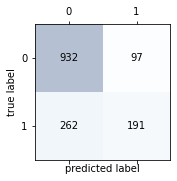

In [156]:
def svm(data):
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.1, random_state=42)
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    ROC(y_test, out)
    return accuracy_score(y_test, out), out, y_test;
    
    

acc, pre, label = svm(imput_P)
print(acc)
confusion(pre,label)

## 5.6 DNN

In [157]:
def DNN(data):
    import keras
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.utils import to_categorical
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.2, random_state=42)
    
    y_train = to_categorical(y_train, 2)
    y_test = to_categorical(y_test, 2)

    input_shape = (X_train.shape[1],)

    # Create the model
    model = Sequential()
    model.add(Dense(32, input_shape=input_shape, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=5, verbose=1, validation_split=0.2)
    
    
    _, train_acc = model.evaluate(X_train, y_train, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    
    learn_curve(history)
    
    return train_acc,test_acc

Epoch 1/10
1896/1896 [==============================] - 2s 839us/step - loss: 1.2844 - accuracy: 0.6564 - val_loss: 1.4481 - val_accuracy: 0.3802
Epoch 2/10
1896/1896 [==============================] - 1s 777us/step - loss: 0.6616 - accuracy: 0.6933 - val_loss: 0.5978 - val_accuracy: 0.6895
Epoch 3/10
1896/1896 [==============================] - 1s 769us/step - loss: 0.6392 - accuracy: 0.6919 - val_loss: 0.6272 - val_accuracy: 0.6831
Epoch 4/10
1896/1896 [==============================] - 1s 768us/step - loss: 0.6255 - accuracy: 0.6821 - val_loss: 0.6114 - val_accuracy: 0.6827
Epoch 5/10
1896/1896 [==============================] - 1s 773us/step - loss: 0.5938 - accuracy: 0.7006 - val_loss: 0.5901 - val_accuracy: 0.7143
Epoch 6/10
1896/1896 [==============================] - 1s 788us/step - loss: 0.5790 - accuracy: 0.7146 - val_loss: 0.5666 - val_accuracy: 0.7207
Epoch 7/10
1896/1896 [==============================] - 1s 763us/step - loss: 0.5653 - accuracy: 0.7229 - val_loss: 0.5652 -

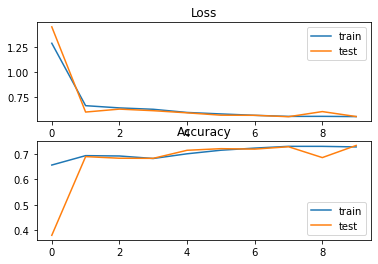

(0.7445138692855835, 0.7495781183242798)

In [158]:
DNN(imput_data)

## 5.7 預測在ICU時間

In [159]:
error, mse = LSR(All_shape.drop('icustay_id',axis=1))

In [160]:
mse

2.070780348003104e-27

/home/ubuntu/miniconda3/envs/mimic3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='los'>

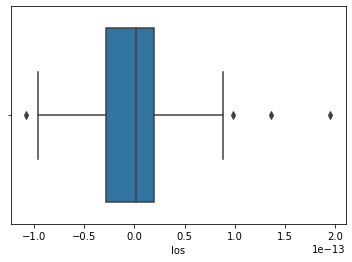

In [161]:
sns.boxplot(error)

## 5.8 預測時間，以相關性篩選

In [162]:
## 相似性分析
All_shape_c = All_shape.drop('icustay_id',axis=1)
All_cor = All_shape_c.corr()
All_cor

,los,age,mortality_90d,mingcs,gcsmotor,gcsverbal,gcseyes,endotrachflag,aniongap_min,aniongap_max,...,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean
los,1.000000,-0.015302,-0.109560,-0.005449,0.006314,0.069715,0.037321,-0.046010,-0.096348,-0.113921,...,0.031285,0.053474,0.097572,0.098146,-0.040963,-0.026565,-0.056880,0.013192,-0.080193,-0.063964
age,-0.015302,1.000000,0.199732,-0.003196,0.032580,-0.063415,0.004768,0.048317,0.022462,0.008725,...,-0.175625,-0.140441,-0.224727,-0.208420,-0.055944,-0.026495,-0.019670,0.035490,0.014722,0.025983
mortality_90d,-0.109560,0.199732,1.000000,-0.000750,-0.090422,0.012447,-0.007315,-0.007684,0.275055,0.272685,...,0.086801,-0.146767,-0.157486,-0.201606,-0.093441,-0.057833,-0.082127,-0.085213,0.046926,-0.006291
mingcs,-0.005449,-0.003196,-0.000750,1.000000,0.265033,0.019420,0.257022,0.537964,0.023313,-0.040907,...,-0.003167,0.053394,0.010785,0.006127,0.006599,-0.028344,-0.030055,-0.034797,-0.074064,-0.089097
gcsmotor,0.006314,0.032580,-0.090422,0.265033,1.000000,0.506375,0.738481,-0.344383,-0.070688,-0.078593,...,-0.026530,0.111786,-0.043433,0.014091,0.014825,0.117423,0.100607,-0.088515,-0.094206,-0.119031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spo2_max,-0.026565,-0.026495,-0.057833,-0.028344,0.117423,0.064605,0.065301,-0.079977,-0.095768,-0.118244,...,-0.024673,0.035684,0.089956,0.064904,0.279297,1.000000,0.699610,-0.011755,-0.126847,-0.075116
spo2_mean,-0.056880,-0.019670,-0.082127,-0.030055,0.100607,0.029703,0.042244,-0.051243,-0.116867,-0.167142,...,-0.176498,0.064804,0.050037,0.037371,0.695836,0.699610,1.000000,0.041460,-0.108333,-0.037333
glucose_min_y,0.013192,0.035490,-0.085213,-0.034797,-0.088515,-0.107383,-0.097019,0.078155,-0.095129,-0.106001,...,-0.015213,0.000568,0.009391,0.009084,0.051023,-0.011755,0.041460,1.000000,0.270447,0.643054
glucose_max_y,-0.080193,0.014722,0.046926,-0.074064,-0.094206,-0.055695,-0.089725,0.008920,0.175291,0.308273,...,0.130520,-0.154422,-0.003316,-0.093507,-0.123938,-0.126847,-0.108333,0.270447,1.000000,0.840837


In [163]:
abs(All_cor.los).describe()

count    87.000000
mean      0.065585
std       0.108244
min       0.000204
25%       0.022650
50%       0.046010
75%       0.087063
max       1.000000
Name: los, dtype: float64

In [164]:
All_shape_C = All_shape_c[All_shape_c.columns[abs(All_cor.los)>abs(All_cor.los).describe()[6]]]

In [165]:
error, mse = LSR(All_shape_C)

In [166]:
mse

2.3850523503352754e-28

/home/ubuntu/miniconda3/envs/mimic3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='los'>

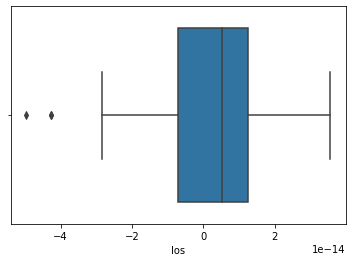

In [167]:
sns.boxplot(error)

## 5.9 Autoencoder

In [168]:
def AE(data):
    import keras
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.utils import to_categorical
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d","los"],axis=1)
                                                    ,data.los, test_size=0.2, random_state=42)
    

    input_shape = (X_train.shape[1],)

    # Create the model
    model = Sequential()
    model.add(Dense(40, input_shape=input_shape, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(input_shape[0], activation='relu'))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['MeanSquaredError'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1, validation_split=0.2)
    
    plt.subplot(211)
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    



In [ ]:
AE(All_shape.drop('icustay_id',axis=1))

Epoch 1/50
366/366 [==============================] - 0s 1ms/step - loss: 203.5701 - mean_squared_error: 203.5701 - val_loss: 136.3233 - val_mean_squared_error: 136.3233
Epoch 2/50
366/366 [==============================] - 0s 839us/step - loss: 174.8181 - mean_squared_error: 174.8181 - val_loss: 142.4948 - val_mean_squared_error: 142.4948
Epoch 3/50
366/366 [==============================] - 0s 845us/step - loss: 172.7251 - mean_squared_error: 172.7251 - val_loss: 129.2793 - val_mean_squared_error: 129.2793
Epoch 4/50
366/366 [==============================] - 0s 844us/step - loss: 167.2672 - mean_squared_error: 167.2672 - val_loss: 129.5922 - val_mean_squared_error: 129.5922
Epoch 5/50
366/366 [==============================] - 0s 828us/step - loss: 164.0837 - mean_squared_error: 164.0837 - val_loss: 135.5799 - val_mean_squared_error: 135.5799
Epoch 6/50
361/366 [============================>.] - ETA: 0s - loss: 167.2126 - mean_squared_error: 167.2126